## 1. Perform an Exploratory Data Analysis on the data

In [1]:
# Iporting important liraries 

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.3f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
# reading data from the data frame

In [4]:
# as there are two tabs in the excel file by printing the xls.sheet_names, i choose the second tab
df = pd.read_excel('Tourism.xlsx','Tourism') 
df.head() # reading the first five rows of the dataset using the head() function

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.000,Self Enquiry,3,6.000,Salaried,Female,3,3.000,Super Deluxe,3.000,Single,1.000,1,2,1,0.000,Manager,"20,993.000"
1,200001,0,49.000,Company Invited,1,14.000,Salaried,Male,3,4.000,Super Deluxe,4.000,Divorced,2.000,0,3,1,2.000,Manager,"20,130.000"
2,200002,1,37.000,Self Enquiry,1,8.000,Free Lancer,Male,3,4.000,Multi,3.000,Single,7.000,1,3,0,0.000,Executive,"17,090.000"
3,200003,0,33.000,Company Invited,1,9.000,Salaried,Female,2,3.000,Multi,3.000,Divorced,2.000,1,5,1,1.000,Executive,"17,909.000"
4,200004,0,nan,Self Enquiry,1,8.000,Small Business,Male,2,3.000,Multi,4.000,Divorced,1.000,0,5,1,0.000,Executive,"18,468.000"


In [5]:
# checking the shape of the data
row, column = df.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 4888 rows and 20 columns


In [6]:
# printing the datatype of each colimn in the dataframe
print('The datatype information for each attribute: \n')
df.info()

The datatype information for each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 n

Insights :
1. Age,Number of trips, NumberOfChildrenVisited represented and other columns represented as float.
2. We have to covert the NumberOfChildrenVisited into categorical.'
3. Other int and float type values will also be changed to categorical below depending on their use.


In [7]:
# checking the data types of each of the columns in the data set
df.dtypes

CustomerID                   int64
ProdTaken                    int64
Age                        float64
PreferredLoginDevice        object
CityTier                     int64
DurationOfPitch            float64
Occupation                  object
Gender                      object
NumberOfPersonVisited        int64
NumberOfFollowups          float64
ProductPitched              object
PreferredPropertyStar      float64
MaritalStatus               object
NumberOfTrips              float64
Passport                     int64
PitchSatisfactionScore       int64
OwnCar                       int64
NumberOfChildrenVisited    float64
Designation                 object
MonthlyIncome              float64
dtype: object

In [8]:
# categorizing into object and changing them to categorical data
# Object types
data = df.select_dtypes(['float64'])
print(data.columns)

Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'NumberOfChildrenVisited', 'MonthlyIncome'],
      dtype='object')


In [9]:
# changing the data objects identified above into categorical
for columns in data.columns:
    df[columns] = df[columns].astype('float64')
    print(columns)

Age
DurationOfPitch
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
NumberOfChildrenVisited
MonthlyIncome


In [10]:
# with the same fashion as above, the rest of the columns shall be coverted to cagorical to make it consisten
covertingToCategorical = df[['ProdTaken',
                      'NumberOfFollowups',
                      'PreferredPropertyStar',
                      'NumberOfTrips',
                      'NumberOfPersonVisited',     
                      'CityTier',
                      'Passport',
                      'NumberOfChildrenVisited',
                      'PitchSatisfactionScore',
                      'OwnCar',
                     ]]
covertingToCategorical.head()

,ProdTaken,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfPersonVisited,CityTier,Passport,NumberOfChildrenVisited,PitchSatisfactionScore,OwnCar
0,1,3.000,3.000,1.000,3,3,1,0.000,2,1
1,0,4.000,4.000,2.000,3,1,0,2.000,3,1
2,1,4.000,3.000,7.000,3,1,1,0.000,3,0
3,0,3.000,3.000,2.000,2,1,1,1.000,5,1
4,0,3.000,4.000,1.000,2,1,0,0.000,5,1


In [11]:
# now change the covertingToCategorical columns into category type
for columns in covertingToCategorical.columns:
    df[columns] = df[columns].astype('category')
    print(columns)

ProdTaken
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
NumberOfPersonVisited
CityTier
Passport
NumberOfChildrenVisited
PitchSatisfactionScore
OwnCar


In [12]:
print(' data types of each of the columns in the data set after conversion')
df.info()

 data types of each of the columns in the data set after conversion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   category
 2   Age                      4662 non-null   float64 
 3   PreferredLoginDevice     4863 non-null   object  
 4   CityTier                 4888 non-null   category
 5   DurationOfPitch          4637 non-null   float64 
 6   Occupation               4888 non-null   object  
 7   Gender                   4888 non-null   object  
 8   NumberOfPersonVisited    4888 non-null   category
 9   NumberOfFollowups        4843 non-null   category
 10  ProductPitched           4888 non-null   object  
 11  PreferredPropertyStar    4862 non-null   category
 12  MaritalStatus            4888 non-null   object  


Insights :
    
    1. All of the necessary columns for analysis are now in float and category types.
    2. the CustomerID is still int but not going to be used in the analysis.
    3. There are total of 4888 entries and 20 columns ready for analysis.

In [13]:
# Descriptive statistical summary of the data using a describe function.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,"4,888.000","202,443.500","1,411.188","200,000.000","201,221.750","202,443.500","203,665.250","204,887.000"
Age,"4,662.000",37.622,9.316,18.000,31.000,36.000,44.000,61.000
DurationOfPitch,"4,637.000",15.491,8.520,5.000,9.000,13.000,20.000,127.000
MonthlyIncome,"4,655.000","23,619.853","5,380.698","1,000.000","20,346.000","22,347.000","25,571.000","98,678.000"


Insights :
    1. Minimum age is 18 and maximum age is 61.
    2. Mean age value is 38
    3. Duration of the pitch by a salesman to customer is min 5 and maximum 127
    4. The maximum monthly income earned is 98678.

In [14]:
df.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
PreferredLoginDevice          2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

In [15]:
df.describe(include=['float64']).T

,count,mean,std,min,25%,50%,75%,max
Age,"4,662.000",37.622,9.316,18.000,31.000,36.000,44.000,61.000
DurationOfPitch,"4,637.000",15.491,8.520,5.000,9.000,13.000,20.000,127.000
MonthlyIncome,"4,655.000","23,619.853","5,380.698","1,000.000","20,346.000","22,347.000","25,571.000","98,678.000"


In [16]:
# the CustomerID can be dropped as it is not adding value to the modeling.
df.drop(['CustomerID'],axis=1,inplace=True)

In [17]:
df.nunique()

ProdTaken                     2
Age                          44
PreferredLoginDevice          2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

In [24]:
# checking the different datasets in the dataframe
print(df.Occupation.value_counts())
print(df.Gender.value_counts())
print(df.ProductPitched.value_counts())
print(df.Designation.value_counts())

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Multi           1842
Super Deluxe    1732
Standard         742
Deluxe           342
King             230
Name: ProductPitched, dtype: int64
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


In [ ]:
# the fe male and Female categorical data with in Gender shall be combines
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)
print(df.Gender.value_counts())

##  Illustrate the insights based on EDA


## Univariate

In [ ]:
# the code is adopted from the last Project
def boxhisto_function(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram 
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="blue") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-') 

In [ ]:
boxhisto_function(df['Age'])

In [ ]:
boxhisto_function(df['DurationOfPitch'])

In [ ]:
boxhisto_function(df['MonthlyIncome'])

Insights 
1. Age is normally distrubted
2. DurationOfPitch is left skewed.
3. MonthlyIncome shows the highest skewed value in 40000

In [ ]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["ProdTaken"],palette='winter')
perc_on_bar(ax,df["ProdTaken"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["PreferredPropertyStar"],palette='winter')
perc_on_bar(ax,df["PreferredPropertyStar"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["CityTier"],palette='winter')
perc_on_bar(ax,df["CityTier"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Occupation"],palette='winter')
perc_on_bar(ax,df["Occupation"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Gender"],palette='winter')
perc_on_bar(ax,df["Gender"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["NumberOfPersonVisited"],palette='winter')
perc_on_bar(ax,df["NumberOfPersonVisited"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["PreferredPropertyStar"],palette='winter')
perc_on_bar(ax,df["PreferredPropertyStar"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["MaritalStatus"],palette='winter')
perc_on_bar(ax,df["MaritalStatus"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["NumberOfTrips"],palette='winter')
perc_on_bar(ax,df["NumberOfTrips"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Passport"],palette='winter')
perc_on_bar(ax,df["Passport"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["OwnCar"],palette='winter')
perc_on_bar(ax,df["OwnCar"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["Designation"],palette='winter')
perc_on_bar(ax,df["Designation"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["PitchSatisfactionScore"],palette='winter')
perc_on_bar(ax,df["PitchSatisfactionScore"])

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["NumberOfFollowups"],palette='winter')
perc_on_bar(ax,df["NumberOfFollowups"])

Insights: 
   1. Product taken flag data shows almost 19 % of the customers have used holiday package
   2. referred login device of the customer in last month is through self enqry for more than 70 %
   3. City tier shows there are 65% customers that has top rank.
   4. Occupation of customer shows 42 % of the customers are small busienss, 49% of them are salaried followed by Large business
        There is no value of Free Lancer occupation.
   5.  Most of the customers are male dominating 60 % of the population.
   6. Martial status of the customers data shows most are married with 48 % followed by Divorced, single and Unmarried.
   7. More than 62 % of the customers owns a car.
    

## Bivariate

In [ ]:
# finding the pearson corrolation and calculating the heathmap of the corrolated data
corr = df.corr(method='pearson')
corr.head()

Age is 46 % corrolated.

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

Both the heatmap and the pearson corrolation are generating the same result.

In [ ]:
# the pairplot of the data that hue on the ProdTaken
cols = df[['Age','MonthlyIncome','DurationOfPitch']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

Insights : 
    1. No difference in customers with prodtaken category between those who took the package and not. 

In [19]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
All                    3948  914  4862
------------------------------------------------------------------------------------------------------------------------


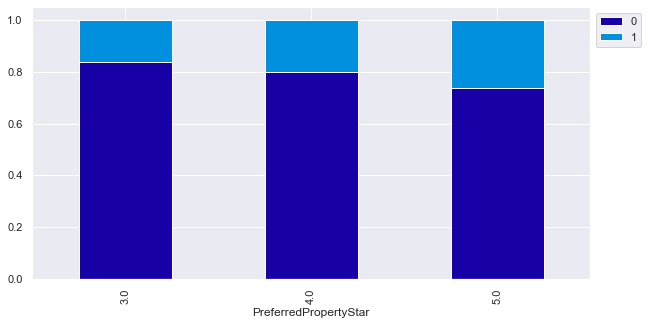

In [20]:
stacked_plot(df['PreferredPropertyStar'])

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


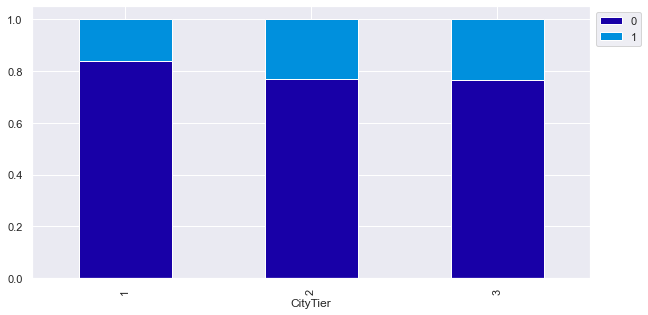

In [21]:
stacked_plot(df['CityTier'])

In [ ]:
stacked_plot(df['Occupation'])

In [ ]:
stacked_plot(df['Gender'])

In [ ]:
stacked_plot(df['NumberOfPersonVisited'])

In [ ]:
stacked_plot(df['NumberOfTrips'])

In [ ]:
stacked_plot(df['Passport'])

In [ ]:
stacked_plot(df['OwnCar'])

In [ ]:
stacked_plot(df['NumberOfChildrenVisited'])

In [ ]:
stacked_plot(df['Designation'])

In [ ]:
stacked_plot(df['Designation'])

In [ ]:
stacked_plot(df['ProductPitched'])

In [ ]:
stacked_plot(df['NumberOfFollowups'])

## 3. Data Pre-processing

In [ ]:
1. # Missing value treatment
print('Missing values Before imputation:\n', df.isnull().sum()) 

Imputing the missing values with Mean, mode and median values depending on the datatype.

In [ ]:
df.groupby(["Designation", "Gender"], as_index=False)["Age"].median()
df["Age"] = df.groupby(["Designation", "Gender"])["Age"].transform(
    lambda x: x.fillna(x.median())
)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace = True)
df[df["Age"].isnull()]
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)
df['DurationOfPitch'].median()
df['DurationOfPitch'].fillna(13, inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0],inplace=True)
df['NumberOfTrips']=df['NumberOfTrips'].fillna(2)
df['NumberOfChildrenVisited'].fillna(df['NumberOfChildrenVisited'].mode()[0],inplace=True)
df.groupby(["Occupation"], as_index=False)["MonthlyIncome"].median()
df["MonthlyIncome"] = df.groupby(["Occupation"])["MonthlyIncome"].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
print('Missing values After imputation:\n', df.isnull().sum()) 

Outlier Detection

In [ ]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 4, 1)
df.Age.plot(x = 'Age', kind = 'box')
plt.title('Boxplot of Age Column')

plt.subplot(1, 4, 2)
df.DurationOfPitch.plot(x = 'DurationOfPitch', kind = 'box')
plt.title('Boxplot of DurationOfPitch Column')

plt.subplot(1, 4, 3)
df.MonthlyIncome.plot(x = 'MonthlyIncome', kind = 'box')
plt.title('Boxplot of MonthlyIncome Column')


Insights:
  1. Age is evenly distributed. Hard to tell about the outlier, it almost got zero.
  2. The outliers for the monthly income are hard to predict. We may need further analysis.
    

## 4. Model building - Bagging


#### spliting the data set into training and test

In [ ]:
# Separating features and the target column, MonthlyIncome is excluded due to it's irrelavance for prediction with high unique values.
X = df.drop(['ProdTaken',
             'PitchSatisfactionScore',
             'ProductPitched',
             'NumberOfFollowups',
             'DurationOfPitch'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['ProdTaken']

In [ ]:
# spliting into a 30 and 70 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

In [ ]:
rtr, ctr = X_train.shape
print('The training set comprises of -', rtr, 'rows and', ctr, '- columns.')

In [ ]:
rt, ct = X_test.shape
print('The test set comprises of -', rt, 'rows and', ct, '- columns.')

#  Model Tunning and Grid search 

# Build bagging classifier, random forest and decision tree

In [ ]:
#1. Calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    precision_score = [] 
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    precision_score.append(train_precision) 
    precision_score.append(test_precision) 
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return precision_score #  list of training and testing scores

In [ ]:
#  2. calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    recall_score = [] 
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    recall_score.append(train_recall) 
    recall_score.append(test_recall) 
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return recall_score #  list with train and test scores

In [ ]:
#3. Calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    accuracy_score = [] 
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    accuracy_score.append(train_acc) 
    accuracy_score.append(test_acc)
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return accuracy_score # returning the list with train and test scores

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
decisionTree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [ ]:
decisionTree.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(decisionTree,y_test)

In [ ]:
dtree_acc = get_accuracy_score(decisionTree)
dtree_precision = get_precision_score(decisionTree)
dtree_recall = get_recall_score(decisionTree)

Insights : 
    1. Data shows it is an overfiting and precission is 86% which is not high.

#### Bagging classification 

In [ ]:
# Step 1. Grid Search for bagging 
baggingClassifier = BaggingClassifier(random_state=1)
baggingClassifier.fit(X_train,y_train)

In [ ]:
baggingClassifier = BaggingClassifier(random_state=1)
baggingClassifier.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(baggingClassifier,y_test)

In [ ]:
bagging_acc = get_accuracy_score(baggingClassifier)
bagging_precision = get_precision_score(baggingClassifier)
bagging_recall = get_recall_score(baggingClassifier)


Insights :
    1. Precission increassed to 89 %.
    2. Recall has increased by 1 %

#### Random Forest Classifier 

In [ ]:
randomForestClassifier = RandomForestClassifier(random_state=1)
randomForestClassifier.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(randomForestClassifier,y_test)

In [ ]:
randomForestClassifier_acc = get_accuracy_score(randomForestClassifier)
randomForestClassifier_precision = get_precision_score(randomForestClassifier)
randomForestClassifier_recall = get_recall_score(randomForestClassifier)

Insights : Precission increased by 1 % than bagging.
           Recall reduced by 9 % 

## Model performance evaluation and improvement


####  1. Decission Tree Tunning and Hyperparametrization

In [ ]:
# Find the Decsion Tree classifier. 
decisionTree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# parameters 
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }


scorer = metrics.make_scorer(metrics.precision_score)

#grid search
grid_obj = GridSearchCV(decisionTree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the  parameters
decisionTree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
decisionTree_estimator.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(decisionTree_estimator,y_test)

In [ ]:
tuned_dtree_acc = gtuned_dtree_recall = get_recall_score(decisionTree_estimator)
get_accuracy_score(decisionTree_estimator)
tuned_dtree_acc

Insights :
    Precission is lower than the above methods but recall has increased to 80 %.

####  2. Decission Triee- Bagging Classification and tunning 

In [ ]:
# grid search for bagging classifier
baggingClassifer = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[baggingClassifer],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'precision', cv = 5)
grid.fit(X_train, y_train)

In [ ]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(bagging_estimator,y_test)

In [ ]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)

Insights :
    
    Precission has increased very well to 90 % and accuracy also improved.

####  3. Random Forest Tunning 

In [ ]:
# Choose the type of classifier. 
randomForest_estimator = RandomForestClassifier(random_state=1)

# parameters 
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# grid search
grid_obj = GridSearchCV(randomForest_estimator, parameters, scoring='precision',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the  parameters
randomForest_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
randomForest_estimator.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(randomForest_estimator,y_test)

In [ ]:
tuned_rf_acc = get_accuracy_score(randomForest_estimator)
tuned_rf_precision = get_precision_score(randomForest_estimator)
tuned_rf_recall = get_recall_score(randomForest_estimator)

Insights : 
    Random forest is also showing overfitting to almost 99 % on the training.

#### Model Comparison between results of Decission Tree, Bagging Classifier and Random Forest 

In [ ]:
# defining list of models
models = [decisionTree, baggingClassifier, randomForestClassifier, decisionTree_estimator, bagging_estimator, randomForest_estimator]
# declare empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models 
for model in models:    
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
   
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
 
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Tuned Decision Tree',
                                          'Tuned Bagging Classifier',
                                          'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test
                                          }) 

comparison_frame

Insights :
    from all of the methods, i choose bagging classifer as it has the hiest precession and good accuracy.

## AdaBoost Classifer, Gradient Boosting Classifier and XGBoost Classifer 

#### 1. AdaBoost Classifer

In [ ]:
adaBoostClassifier = AdaBoostClassifier(random_state=1)
adaBoostClassifier.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(adaBoostClassifier,y_test)

In [ ]:
#Using above defined function to get accuracy,Recall and Precision on train and test set
abc_acc = get_accuracy_score(adaBoostClassifier)
abc_precision = get_precision_score(adaBoostClassifier)
abc_recall = get_recall_score(adaBoostClassifier)

#### 2. Gradient Boosting Classifer

In [ ]:
gradientBoostingClassifier = GradientBoostingClassifier(random_state=1)
gradientBoostingClassifier.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(gradientBoostingClassifier,y_test)

In [ ]:
#Using above defined function to get accuracy,precision and recall on train and test set
gbm_acc = get_accuracy_score(gradientBoostingClassifier)
gbm_precision = get_precision_score(gradientBoostingClassifier)
gbm_recall = get_recall_score(gradientBoostingClassifier)

#### 3. XGBoost Classifer

In [ ]:
xGBClassifier = XGBClassifier(random_state=1,eval_metric='logloss')
xGBClassifier.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(xGBClassifier,y_test)

In [ ]:
#Using above defined function to get accuracy,precision and recall on train and test set
xgb_acc = get_accuracy_score(xGBClassifier)
xgb_precision = get_precision_score(xGBClassifier)
xgb_recall = get_recall_score(xGBClassifier)

## Model performance evaluation and improvement

#### Hyperparameter Tuning¶- Futuer Performance tunning 

AdaBoost Classifier

In [ ]:
# Choose the type of classifier. 
adaBoostClassifier_tuned = AdaBoostClassifier(random_state=1)

# parameters 

parameters = {
    
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

#  grid search
grid_obj = GridSearchCV(adaBoostClassifier_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the  parameters
adaBoostClassifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
adaBoostClassifier_tuned.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(adaBoostClassifier_tuned,y_test)

In [ ]:
#Using above defined function to get accuracy,precision,recall on train and test set
tuned_abc_acc = get_accuracy_score(adaBoostClassifier_tuned)
tuned_abc_precision = get_precision_score(adaBoostClassifier_tuned)
tuned_abc_recall = get_recall_score(adaBoostClassifier_tuned)

The data shows that accuracy of traiing is 97 % and precission 96% and recall on training is 89 % and recall on test set is 56 %

#### Gradient Boosting Classifer - Estimator 

In [ ]:
gbclassifier_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbclassifier_init.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(gbclassifier_init,y_test)

In [ ]:
#Using above defined function to get accuracy,precision,recall on train and test set
gbc_acc_init = get_accuracy_score(gbclassifier_init)
gbc_acc_precision = get_precision_score(gbclassifier_init)
gbc_acc_recall = get_recall_score(gbclassifier_init)

 No overfiting is noticed.

In [ ]:
# Choose the type of classifier. 
gbclassifer_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# parameters 

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

#  grid search
grid_obj = GridSearchCV(gbclassifer_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the  parameters
gbclassifer_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbclassifer_tuned.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(gbclassifer_tuned,y_test)

In [ ]:
#Using above defined function to get accuracy on train and test set
tuned_gbc_acc = get_accuracy_score(gbclassifer_tuned)
tuned_gbc_precision = get_precision_score(gbclassifer_tuned)
tuned_gbc_recall = get_recall_score(gbclassifer_tuned)

Accuracry on training is 90.8 %, Accuracy on test is 88 %, precission on training is 92%.
Overall performance Precision has increased.

#### XGBoost Classifier

In [ ]:
# Choose the type of classifier. 
xgboost_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# parameters

parameters = {
    "n_estimators": np.arange(30,100,20),
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Run the grid search
grid_obj = GridSearchCV(xgboost_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
# Set the clf to the best combination of parameters
xgboost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgboost_tuned.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(xgboost_tuned,y_test)

In [ ]:
#Using above defined function to get accuracy,precision and recall on train and test set
tuned_xgb_acc = get_accuracy_score(xgboost_tuned)
tuned_xgb_precision = get_precision_score(xgboost_tuned)
tuned_xgb_recall = get_recall_score(xgboost_tuned)

Overfitting on the Orginal data is observed. Accuracy on training raise to 93 %

#### XGBC Classifier for Decsion Tree, Random Forest and Gradient Boosting

In [ ]:
estimators=[('Decision Tree', decisionTree_estimator),('Random Forest', randomForest_estimator),
           ('Gradient Boosting', gbclassifer_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
make_confusion_matrix(stacking_estimator,y_test)

In [ ]:
stacked_recall = get_recall_score(stacking_estimator)

## Comparing all the models discussed above

In [ ]:
# declare list of models
models = [decisionTree,
          decisionTree_estimator,
          baggingClassifier,
          bagging_estimator,
          randomForestClassifier,
          randomForest_estimator,
          adaBoostClassifier,
          gradientBoostingClassifier,
          xGBClassifier,
          adaBoostClassifier_tuned,
          gbclassifier_init,
          gbclassifer_tuned,
          xgboost_tuned,
          stacking_estimator]
# declare  lists to return results
acc_train = []
acc_test = []
pres_train =[]
pres_test =[]
recall_train =[]
recall_test =[]

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    
    k = get_precision_score(model,False)
    pres_train.append(k[0])
    pres_test.append(k[1])
    l = get_recall_score(model,False)
    recall_train.append(l[0])
    recall_test.append(l[1])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Tuned Decision Tree',
                                          'Bagging Classifier',
                                          'Tuned Bagging Classifier',
                                          'Random Forest',
                                          'Tuned Random Forest',
                                          'Adaboost Classifier',
                                          'Gradient Boosting Classifier',
                                          'XGBoost classifier',
                                          'Tuned Adaboost Classifier',
                                          'Gradient Boosting Classifier with Adaboost'
                                          ,'Tuned Gradient Boosting Classifier',
                                          'Tuned XGBoost Classifier',
                                          'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Precision':pres_train,
                                          'Test_Precision':pres_test,
                                          'Train_Recall':recall_train,
                                          'Test_Recall':recall_test}) 
comparison_frame

In [ ]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)

Bagging classifier and Random forst are showing good performance.
Random forest in general is showing a better performance.
Gradient boosting has good precision and recall.

Business Recommendations and Insights

1. According to the Monthly income prediction, customers with an average income of 40000 is ideal to target
2. The Age box plot and relationship shows that custoems with age of 39 or less are ideal customers.
3. Singles show more inclination to buy the product.
4. From ocupation, Managers shold be a future market target.
5. Follow up more than 6 times shows a good chance of finding a target customer.
6. Bagging classifer, Random forest are good to increase the performance of the model.
7. It is also good to focus on the gradientboosting to increase the accuracy, precision and recall.